## Library

In [ ]:
import keras
from keras import layers
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

## Autoencoder

In [ ]:
encoding_dim = 1000  # This is the size of our encoded representations

input_img = keras.Input(shape=(3072,))

encoded = layers.Dense(2000, activation='relu')(input_img)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = layers.Dense(2000, activation='relu')(encoded)
decoded = layers.Dense(3072, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)

In [ ]:
encoder = keras.Model(input_img, encoded)

In [ ]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-2]
decoder_layer1 = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer1(decoder_layer(encoded_input)))

## Load cifar10

In [ ]:
(x_train, _), (x_test, _) = cifar10.load_data()

print (x_train.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train_2d = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_2d = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
print(x_train.shape)
print(x_train_2d.shape)

(50000, 32, 32, 3)
(50000, 3072)


In [ ]:
autoencoder.compile(optimizer="adam",loss="mse")
autoencoder.fit(x_train_2d, x_train_2d,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test_2d, x_test_2d))

Epoch 1/20
782/782 [==============================] - 11s 10ms/step - loss: 0.0238 - val_loss: 0.0158
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0132 - val_loss: 0.0117
Epoch 3/20
782/782 [==============================] - 7s 8ms/step - loss: 0.0110 - val_loss: 0.0102
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0090 - val_loss: 0.0086
Epoch 6/20
782/782 [==============================] - 9s 11ms/step - loss: 0.0084 - val_loss: 0.0082
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0080 - val_loss: 0.0086
Epoch 8/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0078 - val_loss: 0.0086
Epoch 9/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0075 - val_loss: 0.0077
Epoch 10/20
782/782 [==============================] - 7s 10ms/step - loss: 0.0073 - val_loss: 0.

In [ ]:
encoded_imgs_1 = encoder.predict(x_test_2d)
decoded_imgs_1 = decoder.predict(encoded_imgs_1)

313/313 [==============================] - 0s 1ms/step


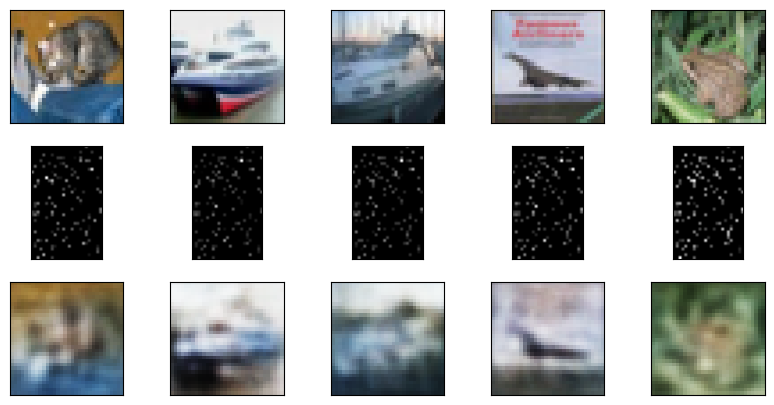

In [ ]:
n = 5
plt.figure(figsize=(10, 5))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_2d[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1+n)
    plt.imshow(encoded_imgs_1[i].reshape(40,25))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs_1[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## add noise to the input image

In [ ]:
mu, sigma = 0, 0.1
noise = np.random.normal(mu, sigma, size=x_train_2d.shape)
x_train_noise=np.clip(x_train_2d + noise, 0.0, 1.0)
noise = np.random.normal(mu, sigma, size=x_test_2d.shape)
x_test_noise=np.clip(x_test_2d + noise, 0.0, 1.0)

In [ ]:
autoencoder.compile(optimizer="adam",loss="mse")
autoencoder.fit(x_train_noise, x_train_2d,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test_noise, x_test_2d))

Epoch 1/20
782/782 [==============================] - 9s 10ms/step - loss: 0.0080 - val_loss: 0.0074
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0068 - val_loss: 0.0072
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0067 - val_loss: 0.0071
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0066 - val_loss: 0.0069
Epoch 5/20
782/782 [==============================] - 7s 8ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 8/20
782/782 [==============================] - 7s 8ms/step - loss: 0.0064 - val_loss: 0.0071
Epoch 9/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0064 - val_loss: 0.0070
Epoch 10/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0063 - val_loss: 0.007

In [ ]:
encoded_imgs_2 = encoder.predict(x_test_noise)
decoded_imgs_2 = decoder.predict(encoded_imgs_2)

313/313 [==============================] - 1s 2ms/step


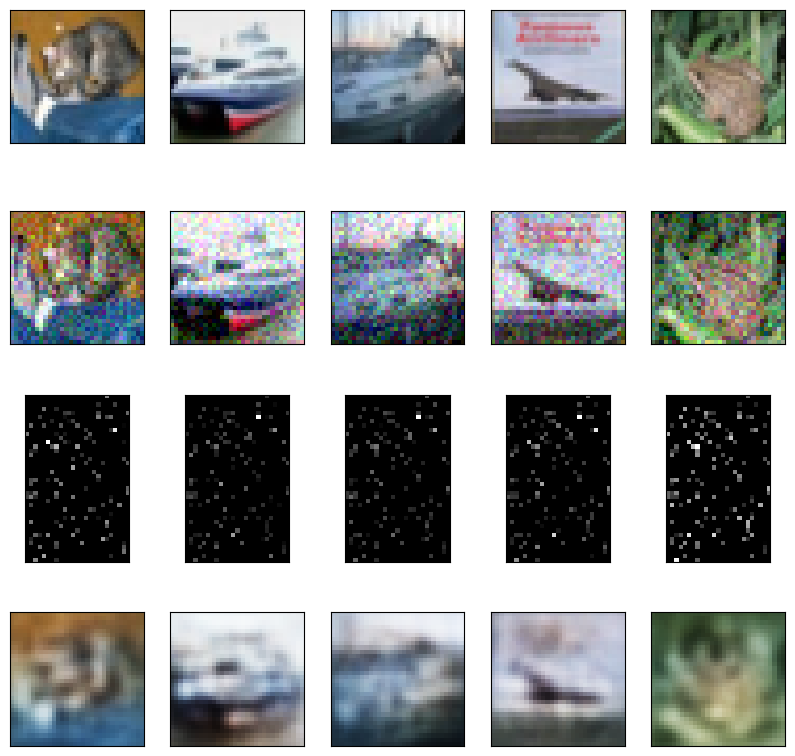

In [ ]:
n = 5
plt.figure(figsize=(10, 10))
for i in range(n):
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test_2d[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(x_test_noise[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(4, n, i + 1+2*n)
    plt.imshow(encoded_imgs_2[i].reshape(40,25))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(4, n, i + 1 + 3*n)
    plt.imshow(decoded_imgs_2[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
autoencoder.compile(optimizer="adam",loss="mse")
autoencoder.fit(x_train_2d, x_train_2d,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test_2d, x_test_2d))

Epoch 1/20
782/782 [==============================] - 9s 10ms/step - loss: 0.0066 - val_loss: 0.0064
Epoch 2/20
782/782 [==============================] - 8s 10ms/step - loss: 0.0057 - val_loss: 0.0061
Epoch 3/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0057 - val_loss: 0.0060
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0057 - val_loss: 0.0061
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0057 - val_loss: 0.0061
Epoch 6/20
782/782 [==============================] - 7s 8ms/step - loss: 0.0056 - val_loss: 0.0060
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0056 - val_loss: 0.0061
Epoch 8/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0056 - val_loss: 0.0060
Epoch 9/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0056 - val_loss: 0.0059
Epoch 10/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0056 - val_loss: 0.00

## add noise to the code

In [ ]:
encoded_imgs_3 = encoder.predict(x_test_2d)
noise = np.random.normal(mu, sigma, size=encoded_imgs_3.shape)
encoded_imgs_noise_3=np.clip(encoded_imgs_3 + noise, 0.0, 1.0)
decoded_imgs_3 = decoder.predict(encoded_imgs_noise_3)

313/313 [==============================] - 1s 2ms/step


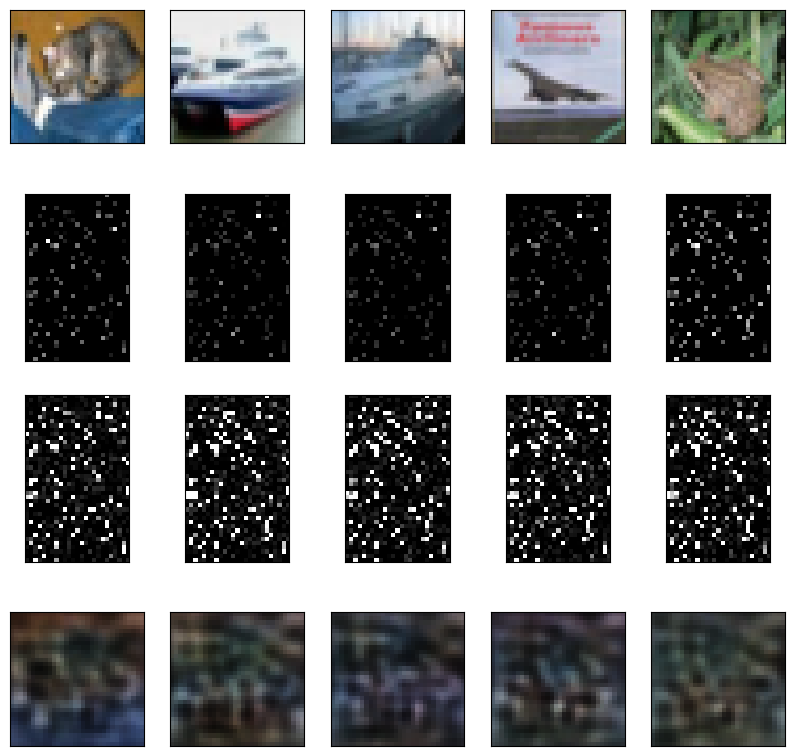

In [ ]:
n = 5
plt.figure(figsize=(10, 10))
for i in range(n):
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test_2d[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(encoded_imgs_3[i].reshape(40, 25))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(4, n, i + 1+2*n)
    plt.imshow(encoded_imgs_noise_3[i].reshape(40,25))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(4, n, i + 1 + 3*n)
    plt.imshow(decoded_imgs_3[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##  PCA as an image denoiser

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1000)
encoded_pca = pca.fit_transform(x_test_2d)
denoised_images_pca = pca.inverse_transform(encoded_pca)

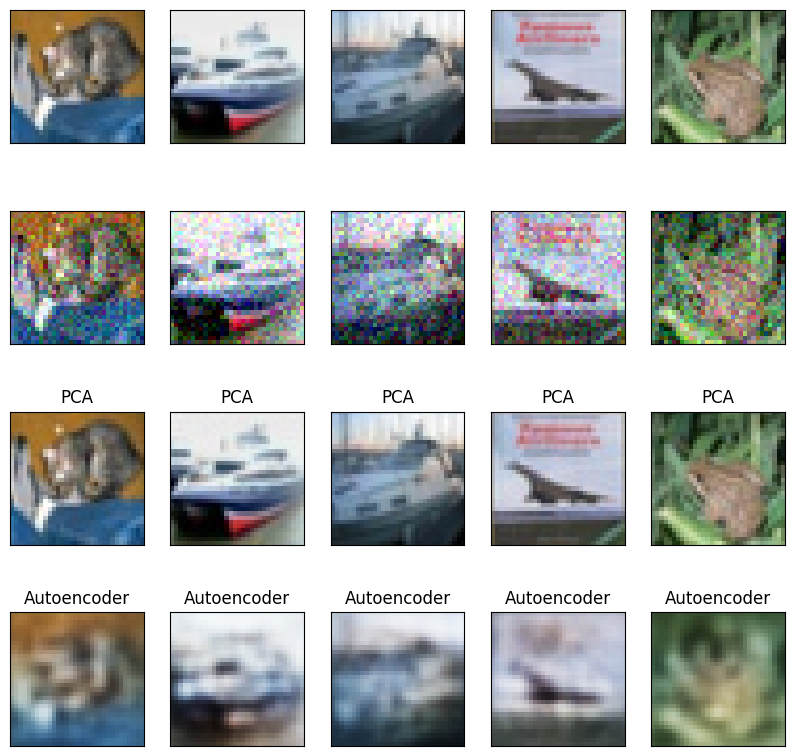

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(n):
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test_2d[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(x_test_noise[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(4, n, i + 1 + 2*n)
    plt.imshow(denoised_images_pca[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('PCA')

    ax = plt.subplot(4, n, i + 1 + 3*n)
    plt.imshow(decoded_imgs_2[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Autoencoder')
plt.show()

In [ ]:
compression_ratio_autoencoder = np.prod(encoded_imgs_2.shape[1:]) / np.prod(x_test_2d.shape[1:])
compression_ratio_pca =  np.prod(encoded_pca.shape[1:]) / np.prod(x_test_2d.shape[1:])

print(f"Compression Ratio (Autoencoder): {compression_ratio_autoencoder}")
print(f"Compression Ratio (PCA): {compression_ratio_pca}")

Compression Ratio (Autoencoder): 0.3255208333333333
Compression Ratio (PCA): 0.3255208333333333


## CNN Autoencoder

In [ ]:
input_img = keras.Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2))(x)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencodercnn = keras.Model(input_img, decoded)

In [ ]:
autoencodercnn.compile(optimizer='adam', loss='mse')
autoencodercnn.fit(x_train, x_train,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
782/782 [==============================] - 9s 11ms/step - loss: 0.0042 - val_loss: 0.0015
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 3/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0010 - val_loss: 9.1623e-04
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 8.9003e-04 - val_loss: 8.0492e-04
Epoch 5/20
782/782 [==============================] - 6s 7ms/step - loss: 8.0328e-04 - val_loss: 7.5380e-04
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 7.4334e-04 - val_loss: 8.5361e-04
Epoch 7/20
782/782 [==============================] - 6s 7ms/step - loss: 7.0120e-04 - val_loss: 6.2446e-04
Epoch 8/20
782/782 [==============================] - 6s 7ms/step - loss: 6.5768e-04 - val_loss: 5.8664e-04
Epoch 9/20
782/782 [==============================] - 6s 8ms/step - loss: 6.2125e-04 - val_loss: 5.7642e-04
Epoch 10/20
782/782 [==========================

In [ ]:
autoencoder.compile(optimizer="adam",loss="mse")
autoencoder.fit(x_train_2d, x_train_2d,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test_2d, x_test_2d))

Epoch 1/20
782/782 [==============================] - 9s 10ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0054 - val_loss: 0.0060
Epoch 5/20
782/782 [==============================] - 7s 8ms/step - loss: 0.0054 - val_loss: 0.0057
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0054 - val_loss: 0.0058
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 8/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0054 - val_loss: 0.0058
Epoch 9/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0054 - val_loss: 0.0062
Epoch 10/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0053 - val_loss: 0.005

In [ ]:
autoencoder_predict = autoencoder.predict(x_test_2d)
autoencodercnn_predict = autoencodercnn.predict(x_test)

313/313 [==============================] - 1s 2ms/step


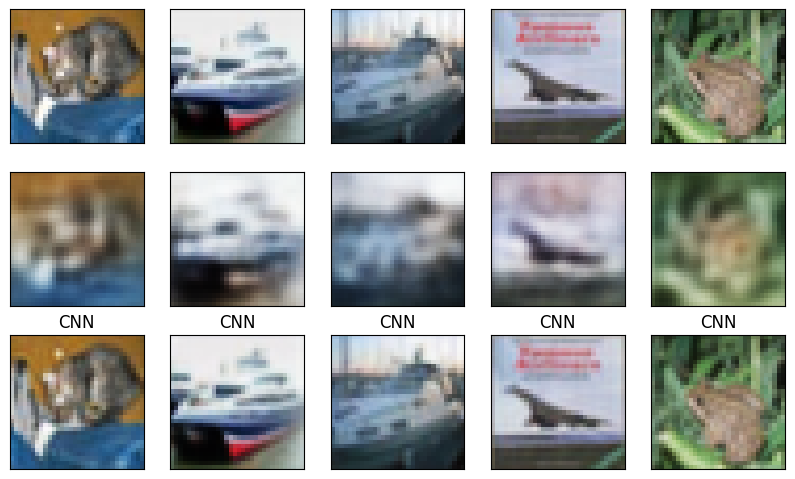

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_2d[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(autoencoder_predict[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(autoencodercnn_predict[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('CNN')
plt.show()

## Report for the project

Text(0.5, 1.0, 'Image with noise')

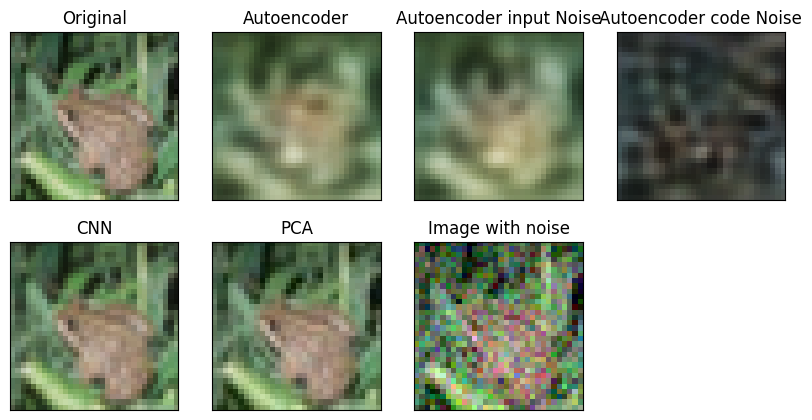

In [ ]:
plt.figure(figsize=(10, 5))
ax = plt.subplot(2, 4,  1)
plt.imshow(x_test_2d[4].reshape(32, 32,3))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Original")

ax = plt.subplot(2, 4,  2)
plt.imshow(decoded_imgs_1[4].reshape(32, 32,3))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Autoencoder")

ax = plt.subplot(2, 4,  3)
plt.imshow(decoded_imgs_2[4].reshape(32, 32,3))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Autoencoder input Noise")

ax = plt.subplot(2, 4,  4)
plt.imshow(decoded_imgs_3[4].reshape(32, 32,3))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Autoencoder code Noise")

ax = plt.subplot(2, 4, 5)
plt.imshow(autoencodercnn_predict[i])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title('CNN')

ax = plt.subplot(2, 4, 6)
plt.imshow(denoised_images_pca[i].reshape(32, 32,3))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title('PCA')

ax = plt.subplot(2, 4, 7)
plt.imshow(x_test_noise[i].reshape(32, 32,3))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title('Image with noise')